In [22]:
import pandas as pd
df = pd.read_csv('grow_75-9.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1975Q2,Minnie Riperton,2.0,False,1.0,1,Lovin' You,12.0,5591.382
1,1975Q2,The Elton John Band,3.0,False,2.0,2,Philadelphia Freedom,5.0,5591.382
2,1975Q2,Ringo Starr,6.0,False,3.0,3,No No Song/snookeroo,9.0,5591.382
3,1975Q2,B.T. Express,4.0,False,4.0,4,Express,11.0,5591.382
4,1975Q2,Joe Cocker,5.0,False,5.0,5,You Are So Beautiful/It's A Sin When You Love ...,13.0,5591.382
...,...,...,...,...,...,...,...,...,...
15195,1980Q1,Billy Joel,NaN,NaN,NaN,96,You May Be Right,NaN,6842.024
15196,1980Q1,Paul Simon,NaN,NaN,NaN,97,Late in the Evening,NaN,6842.024
15197,1980Q1,Prince,NaN,NaN,NaN,98,I Wanna Be Your Lover,NaN,6842.024
15198,1980Q1,Spargo,NaN,NaN,NaN,99,You & Me,NaN,6842.024


In [23]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1975Q2,Minnie Riperton,2.0,False,1.0,1,Lovin' You,12.0,5591.382,1.0
1,1975Q2,The Elton John Band,3.0,False,2.0,2,Philadelphia Freedom,5.0,5591.382,1.0
2,1975Q2,Ringo Starr,6.0,False,3.0,3,No No Song/snookeroo,9.0,5591.382,3.0
3,1975Q2,B.T. Express,4.0,False,4.0,4,Express,11.0,5591.382,0.0
4,1975Q2,Joe Cocker,5.0,False,5.0,5,You Are So Beautiful/It's A Sin When You Love ...,13.0,5591.382,0.0
...,...,...,...,...,...,...,...,...,...,...
14695,1980Q1,The Brothers Johnson,50.0,False,45.0,45,Stomp!,4.0,6842.024,5.0
14696,1980Q1,Anne Murray,30.0,False,12.0,46,Daydream Believer,16.0,6842.024,-16.0
14697,1980Q1,Boz Scaggs,65.0,False,47.0,47,Breakdown Dead Ahead,2.0,6842.024,18.0
14698,1980Q1,Roberta Flack With Donny Hathaway,54.0,False,48.0,48,You Are My Heaven,8.0,6842.024,6.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

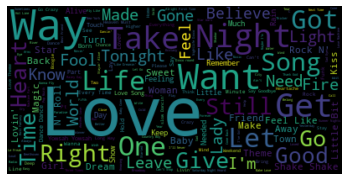

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [26]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_19164\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
0,1975Q2,Minnie Riperton,2.0,False,1.0,1,Lovin' You,12.0,5591.382,1.0,1
1,1975Q2,The Elton John Band,3.0,False,2.0,2,Philadelphia Freedom,5.0,5591.382,1.0,1
2,1975Q2,Ringo Starr,6.0,False,3.0,3,No No Song/snookeroo,9.0,5591.382,3.0,1
5,1975Q2,Phoebe Snow,7.0,False,6.0,6,Poetry Man,14.0,5591.382,1.0,1
6,1975Q2,Labelle,1.0,False,1.0,7,Lady Marmalade,14.0,5591.382,-6.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
14695,1980Q1,The Brothers Johnson,50.0,False,45.0,45,Stomp!,4.0,6842.024,5.0,1
14696,1980Q1,Anne Murray,30.0,False,12.0,46,Daydream Believer,16.0,6842.024,-16.0,-1
14697,1980Q1,Boz Scaggs,65.0,False,47.0,47,Breakdown Dead Ahead,2.0,6842.024,18.0,1
14698,1980Q1,Roberta Flack With Donny Hathaway,54.0,False,48.0,48,You Are My Heaven,8.0,6842.024,6.0,1


In [28]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

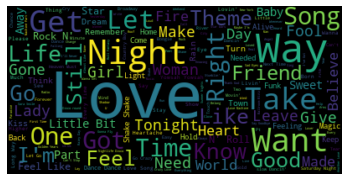

In [29]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

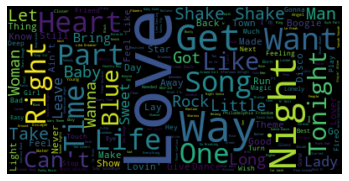

In [30]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [31]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_19164\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_19164\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df['track_title'].value_counts()[:8]

Dance With Me                                     32
I Go Crazy                                        27
A Fifth Of Beethoven                              26
I Like Dreamin'                                   24
Somewhere In The Night                            24
(Love Is) Thicker Than Water                      23
You Don't Have To Be A Star (To Be In My Show)    23
Love Machine (Part 1)                             23
Name: track_title, dtype: int64

In [33]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_19164\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
0,Lovin' You,1
1,Philadelphia Freedom,1
2,No No Song/snookeroo,1
5,Poetry Man,1
6,Lady Marmalade,-1


In [35]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[  11,   14],
       [ 524, 2256]], dtype=int64)

In [42]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.02      0.44      0.04        25
           1       0.99      0.81      0.89      2780

    accuracy                           0.81      2805
   macro avg       0.51      0.63      0.47      2805
weighted avg       0.99      0.81      0.89      2805

